In [65]:
%load_ext autoreload
%autoreload 2

import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
import numpy as np

from src.modules import plotter as p
from src.modules.analysis import analyseValue, createScenarios, runScen
from src.modules.probabilities import Probabilities
from src.modules import plotter as plttr

plt.style.use(['seaborn-paper','science','no-latex', 'std-colors'])
matplotlib.rc("font", family="Times New Roman")    
plts = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#Config
states = '[2-11]-statespace'
algos = ['mo', "adp"]
iniState = '0,4.0,0.0,0.0,0.044,0.039'
prob = Probabilities()

In [ ]:
runtime = pd.read_pickle("/usr/app/data/tmp/rt.pkl")
splitRuntime = pd.read_pickle("/usr/app/data/tmp/splitrt.pkl")
stateSpace = pd.read_pickle("/usr/app/data/tmp/sspace.pkl")
decisionSpace = pd.read_pickle("/usr/app/data/tmp/dspace.pkl")
totalSpace = pd.read_pickle("/usr/app/data/tmp/tspace.pkl")

# Combine spaces
space = pd.concat([stateSpace, decisionSpace, totalSpace], axis = 1)
space.reset_index(level=0, inplace=True)
space.columns = ["Parameter","State", "Decision", "Total"]
space = pd.melt(space, id_vars=["Parameter"], value_vars=["State", "Decision", "Total"]).astype({"value": int})

allVar = [("rt", runtime), ("splitrt", splitRuntime), ("space", space), ("sspace", stateSpace), ("dspec", decisionSpace), ("tspace", totalSpace)]

In [3]:
# Load decisions
dict_dec = {}
#for a in algos:
#    dict_dec[a] = pd.read_pickle("/usr/app/output/df/%s_best_decisions.pkl" % a)
# Load states
#df_states = pd.read_pickle("/usr/app/output/df/%s.pkl" % states)

#analyseValue(dict_dec, iniState, prob, df_states["s_obj"].to_dict())

11
mo - 0
mo - 1
mo - 2
adp - 0
adp - 1
adp - 2


,Algorithm,Scenario,Value
0,mo,0,0.001100
1,mo,1,-474.991200
2,mo,2,-0.449434
3,adp,0,0.000800
4,adp,1,-474.993600
5,adp,2,-0.449466


2


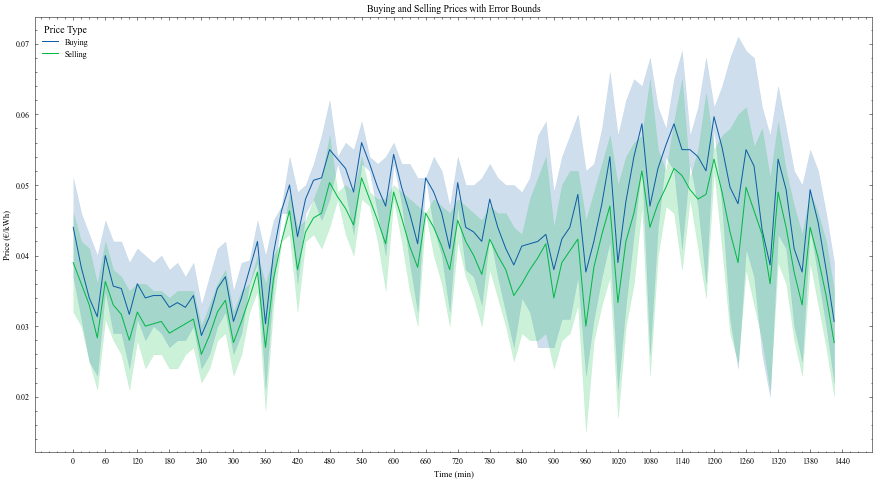

In [66]:
# [GEN] => see data analysis
## 1. Electricity prices for buy and sell with error bars at time
d_prc_b = pd.read_pickle("/usr/app/data/probabilities/d_prc_b.pkl") 
d_prc_s = pd.read_pickle("/usr/app/data/probabilities/d_prc_s.pkl") 
d_prc_b["type"] = "b"
d_prc_s["type"] = "s"
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=pd.concat([d_prc_b, d_prc_s]), x="t", y="prc", hue="type", legend = False)
plttr.formatPlot(g, "Time (min)" , "Price (€/kWh)","Buying and Selling Prices with Error Bounds" , np.arange(0, 1441, 60), None, "Price Type", ['Buying', 'Selling'], "upper left")
plts = [("prob_prc_t", plt.gcf())]


In [ ]:
## 2. Probability to start trip at time
d_trpstrt = pd.read_pickle("/usr/app/data/probabilities/trpstrt.pkl") 
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.barplot(ax=ax, data=d_trpstrt, x="t", y="p(t)", color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plttr.formatPlot(g, "Time (min)" ,"Probability","Tripstart Probability", dense=4)

plts += [("prob_trpstrt", plt.gcf())]


In [48]:
## 3. Probability for trip length according to length and time
d_trpln = pd.read_pickle("/usr/app/data/probabilities/trplen.pkl") 
d_trpln = pd.melt(d_trpln.iloc[:,:-1].copy(), id_vars=['t'], var_name = "Length", value_name = "d(t)")
d_trpln["d(t)"] = d_trpln["d(t)"]*100
d_trpln["d(t)"] = d_trpln["d(t)"].astype("int32")
d_trpln_pivot = d_trpln.pivot("t", "Length", "d(t)")


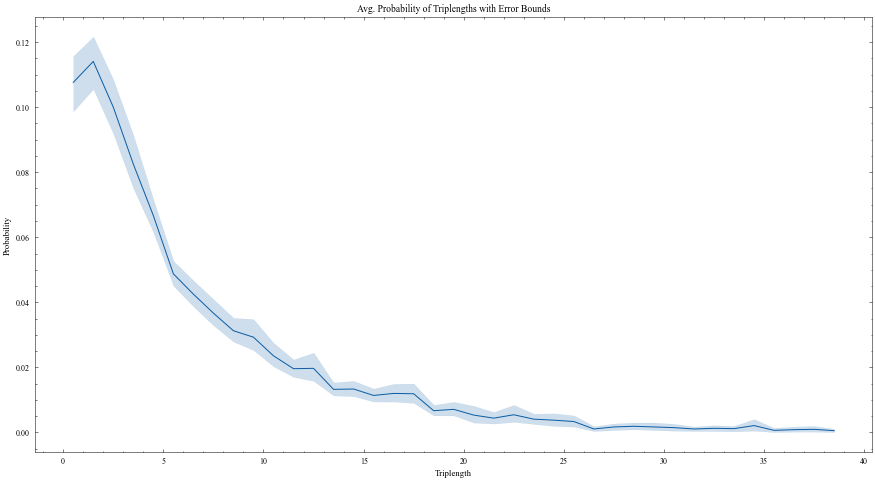

In [59]:
f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(x=d_trpln["Length"], y=d_trpln["d(t)"]/100,legend = False)
plttr.formatPlot(g, "Triplength", "Probability", "Avg. Probability of Triplengths with Error Bounds")
plts += [("prob_trpln_agg", plt.gcf())]

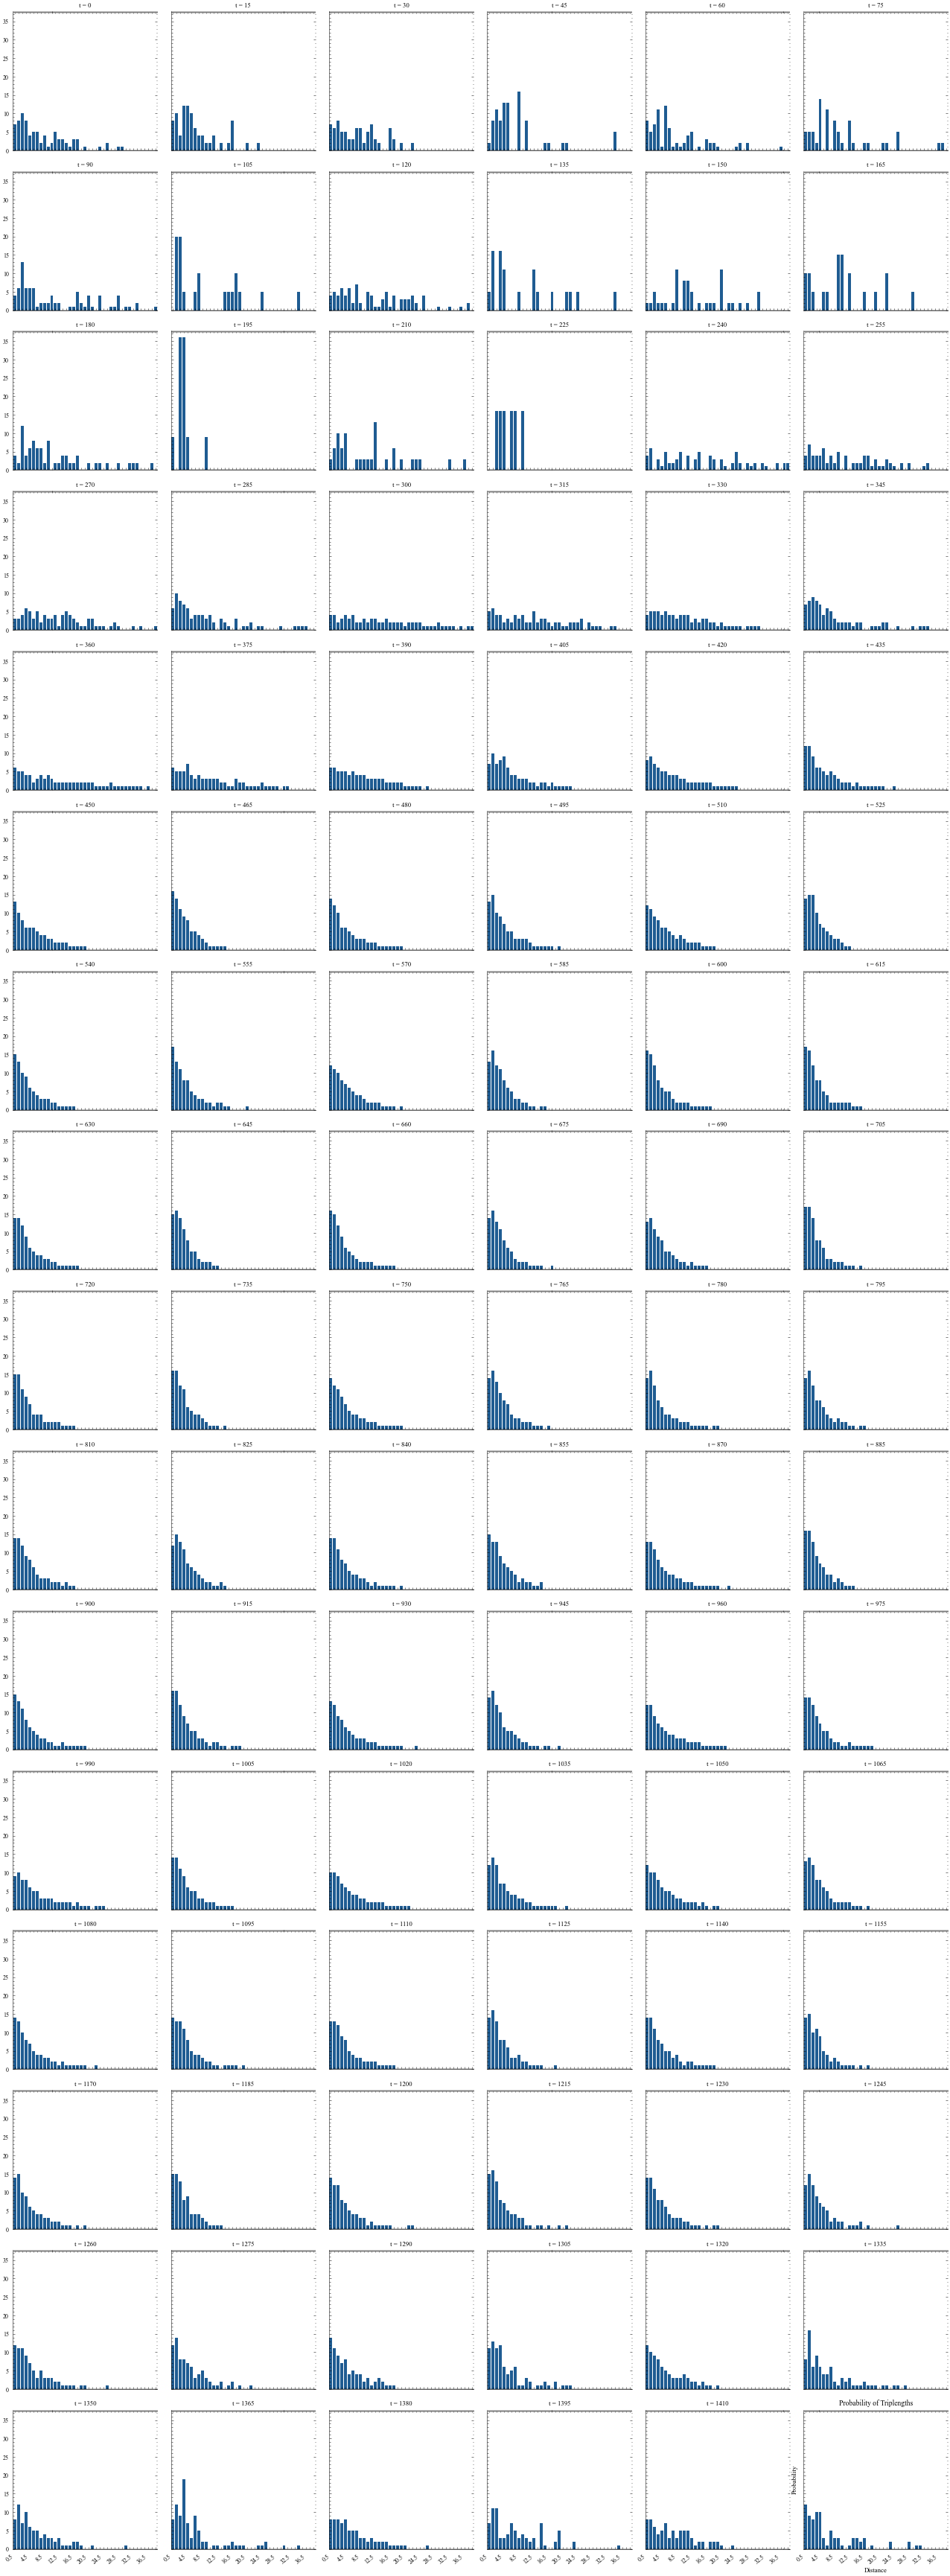

In [60]:
g = sns.FacetGrid(d_trpln, col="t", col_wrap = 6)
g.map_dataframe(sns.barplot, x="Length", y="d(t)")
plttr.formatPlot(g, "Distance", "Probability", "Probability of Triplengths", dense=4)

plts += [("prob_trpln_indiv", plt.gcf())]

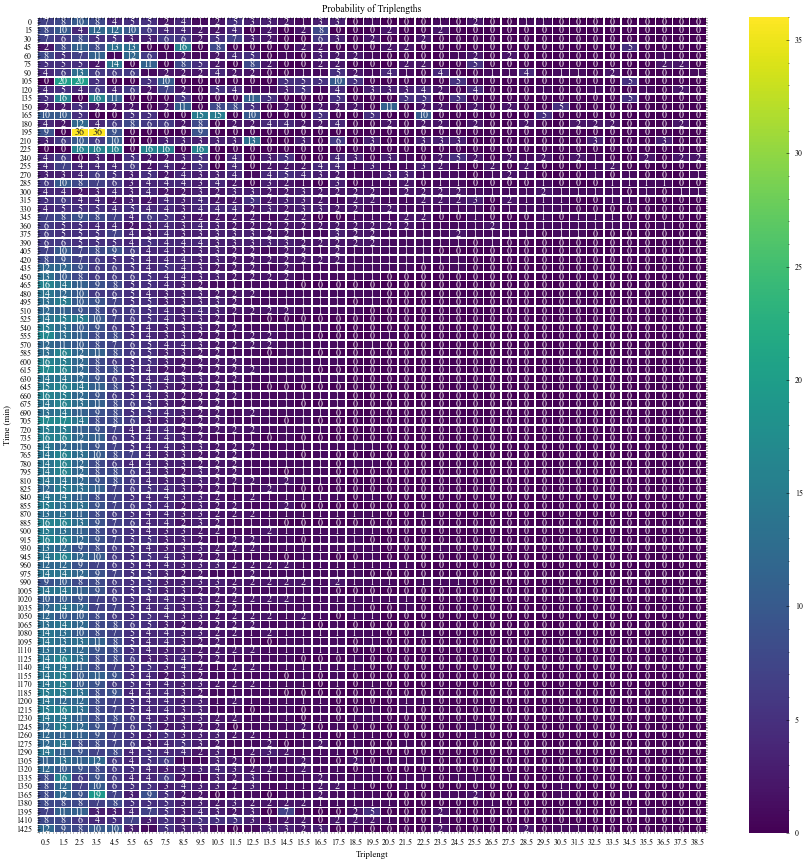

In [63]:
f, ax = plt.subplots(figsize=(15, 15))
g = sns.heatmap(d_trpln_pivot, annot=True, fmt="d", linewidths=.5, ax=ax, cmap = sns.color_palette("viridis", as_cmap=True))
plttr.formatPlot(g, "Triplengt", "Time (min)", "Probability of Triplengths")
plts += [("prob_trpln_heat", plt.gcf())]

In [ ]:
## WONT DO
# [VI] 1. Space comparison in dependence of parameters

#plts += [("space_comparison", p.plot_space(allVar[2]))]

In [ ]:
# 2.[VI] State comparison in dependence of parameters

In [ ]:
# 2.[VI] Decision comparison in dependence of parameters

In [ ]:
# 2.[VI] Total comparison in dependence of parameters

In [ ]:
# 3. [VI] Runtime comparison VI

In [ ]:
# 3. [ALL] Runtime comparison

In [ ]:
# 4.[~VI] Value according to algorithm and scenario

In [ ]:
# 5.[~VI] Decision with price and trip demand

In [67]:
# Export plots
print(plts)
plttr.save(plts)

[('prob_prc_t', <Figure size 1080x576 with 1 Axes>)]
